# Project no. 1 on Data Analysis and Machine Learning

## Iris Data Set
### Problem : Predict the class of the flower based on available attributes.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("/Users/ranjansahoo/Downloads/iris-species/Iris.csv")

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
data.shape

(150, 6)

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [6]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
data['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

### ------------------------------------- Basic Data Preview -------------------------------------------

 - **There are 150 observations with 4 features each (sepal length, sepal width, petal length, petal width).**
 - **There are no null values, so we don't have to worry about that.**
 - **There are 50 observations of each species (setosa, versicolor, virginica).**

### ---------------------------------------------------------------------------------------------------------

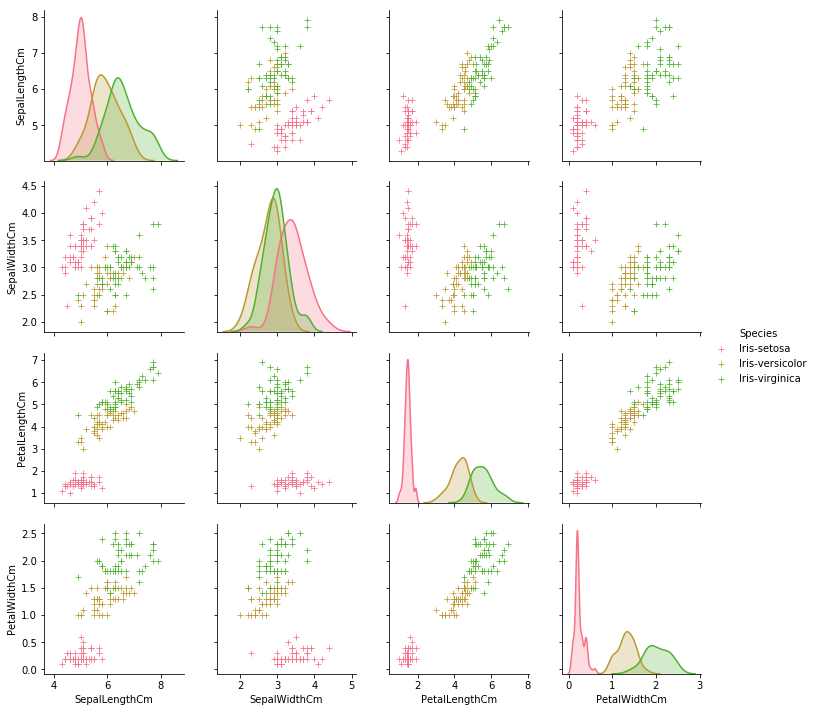

In [9]:
tmp_data = data.drop('Id', axis=1)
sns.pairplot(tmp_data, hue='Species', markers='+')
plt.show()

### Data Visualization
 - **After graphing the features in a pair plot, it is clear that the relationship between pairs of features of a iris-setosa (in pink) is distinctly different from those of the other two species.**
 - **There is some overlap in the pairwise relationships of the other two species, iris-versicolor (brown) and iris-virginica (green).**

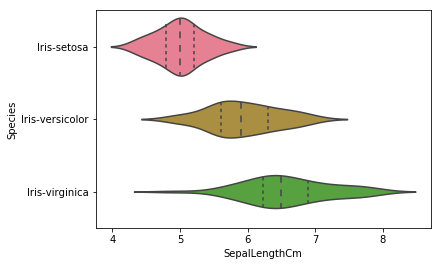

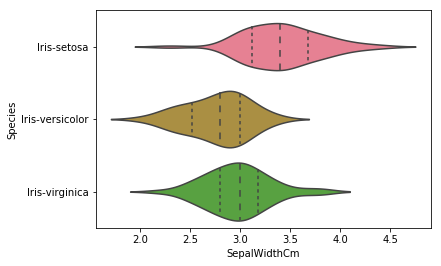

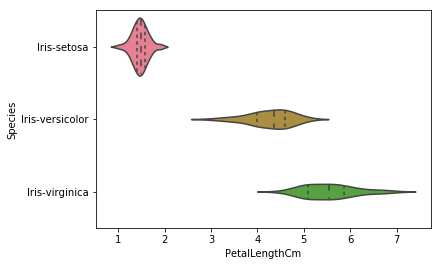

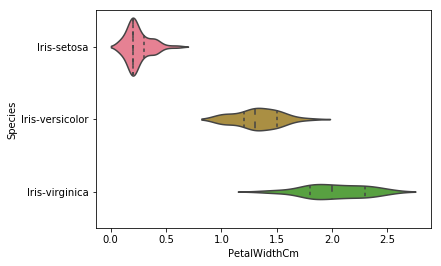

In [18]:
sns.violinplot(y='Species', x='SepalLengthCm', data=data, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='SepalWidthCm', data=data, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='PetalLengthCm', data=data, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='PetalWidthCm', data=data, inner='quartile')
plt.show()

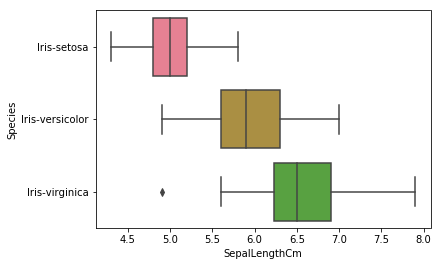

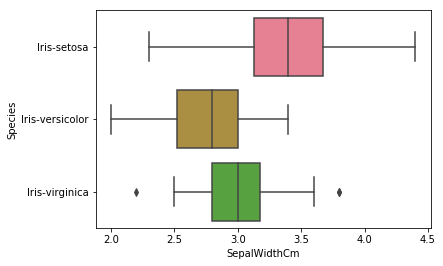

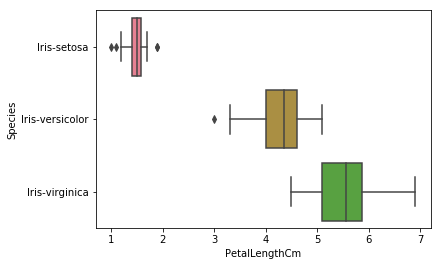

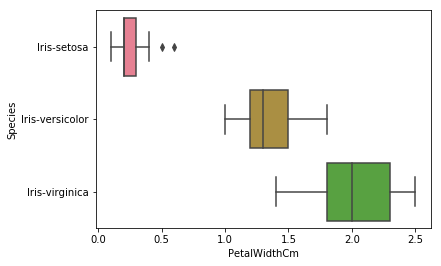

In [17]:
sns.boxplot(y='Species', x='SepalLengthCm', data=data)
plt.show()
sns.boxplot(y='Species', x='SepalWidthCm', data=data)
plt.show()
sns.boxplot(y='Species', x='PetalLengthCm', data=data)
plt.show()
sns.boxplot(y='Species', x='PetalWidthCm', data=data)
plt.show()

### Modeling with scikit-learn

In [19]:
X = data.drop(['Id', 'Species'], axis=1)
y = data['Species']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(150, 4)
(150,)


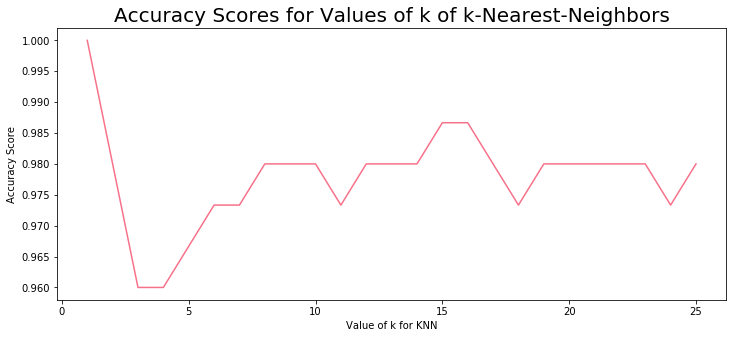

In [22]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))
plt.figure(figsize=(12,5))    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors', fontsize = 20)
plt.show()

In [25]:
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X)
print("The accuracy score : ",metrics.accuracy_score(y, y_pred))

The accuracy score :  0.96


/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


### Split the dataset into a training set and a testing set
#### Advantages
    - By splitting the dataset pseudo-randomly into a two separate sets, we can train using one set and test using another.
    - This ensures that we won't use the same observations in both sets.
    - More flexible and faster than creating a model using all of the dataset for training.
#### Disadvantages
    - The accuracy scores for the testing set can vary depending on what observations are in the set.
    - This disadvantage can be countered using k-fold cross-validation.
#### Notes
    - The accuracy score of the models depends on the observations in the testing set, which is determined by the seed of the pseudo-random number generator (random_state parameter).
    - As a model's complexity increases, the training accuracy (accuracy we get when our train and test the model on the same data) increases.
    - If a model is too complex or not complex enough, the testing accuracy is lower.
    - For KNN models, the value of k determines the level of complexity. A lower value of k means that the model is more complex.


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


Accuracy Score for the k value of  1  :  0.9333333333333333
Accuracy Score for the k value of  2  :  0.9333333333333333
Accuracy Score for the k value of  3  :  0.9555555555555556
Accuracy Score for the k value of  4  :  0.9555555555555556
Accuracy Score for the k value of  5  :  0.9555555555555556
Accuracy Score for the k value of  6  :  0.9777777777777777
Accuracy Score for the k value of  7  :  0.9777777777777777
Accuracy Score for the k value of  8  :  1.0
Accuracy Score for the k value of  9  :  0.9777777777777777
Accuracy Score for the k value of  10  :  0.9777777777777777
Accuracy Score for the k value of  11  :  0.9777777777777777
Accuracy Score for the k value of  12  :  1.0
Accuracy Score for the k value of  13  :  0.9777777777777777
Accuracy Score for the k value of  14  :  1.0
Accuracy Score for the k value of  15  :  1.0
Accuracy Score for the k value of  16  :  1.0
Accuracy Score for the k value of  17  :  1.0
Accuracy Score for the k value of  18  :  1.0
Accuracy Score f

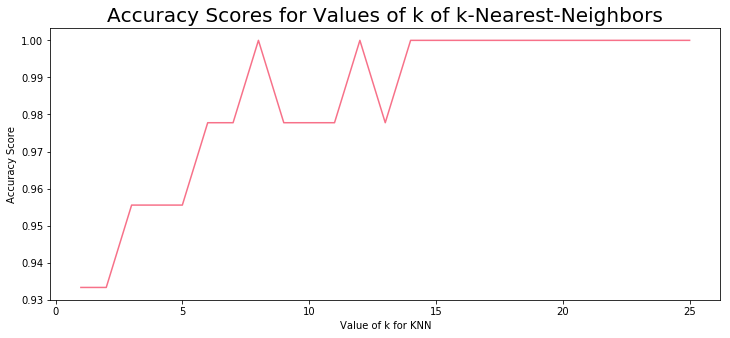

In [35]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print("Accuracy Score for the k value of ",k,' : ',metrics.accuracy_score(y_test, y_pred))
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.figure(figsize=(12,5))
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors', fontsize = 20)
plt.show()

In [30]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9333333333333333


/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


### Choosing KNN to Model Iris Species Prediction with k = 12
After seeing that a value of k = 12 is a pretty good number of neighbors for this model, I used it to fit the model for the entire dataset instead of just the training set.

In [31]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X, y)

# make a prediction for an example of an out-of-sample observation
knn.predict([[6, 3, 4, 2]])

array(['Iris-versicolor'], dtype=object)

### Predicting useing LogisticRegression

In [32]:
logreg.predict([[6, 3, 4, 2]])

array(['Iris-virginica'], dtype=object)